#### Question 3:
Download the dataset containing two columns X and Y. Fix an appropriate threshold and consider Y > threshold as 1 otherwise 0. Perform the following tasks.
#
    1. Create the labels from the given data.
    2. Plot the distribution of samples using the histogram.
    3. Determine the prior probability for both classes.
    4. Determine the class conditional probabilities (likelihood) for the classes.
    5. Plot the count of each unique element for each class.
    6. Calculate the posterior probability of both classes and plot them.
    7. Consider the dataset of question 1 and select any one feature and class label. Repeat
    1 to 6.


- Data load

In [117]:
import numpy as np
import pandas as pd
data = pd.read_csv('data-ques-3/Data.csv')
data.head()


,X,Y
0,1.0,550
1,3.0,566
2,4.0,558
3,3.0,784
4,5.0,333


1. Create the labels from the given data.

<AxesSubplot:>

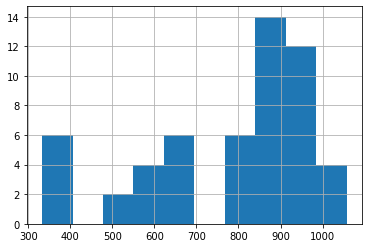

In [118]:
data['Y'].hist()


Choosen thresold 700 as there were clear division in histogram at y = 700

In [119]:
data["label"] = data.Y.apply(lambda x: 0 if x <= 700 else 1)
data.head()


,X,Y,label
0,1.0,550,0
1,3.0,566,0
2,4.0,558,0
3,3.0,784,1
4,5.0,333,0


2. Plot the distribution of samples using the histogram.

C:\Users\debon\AppData\Roaming\Python\Python39\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>],
       [<AxesSubplot:title={'center':'label'}>, <AxesSubplot:>]],
      dtype=object)

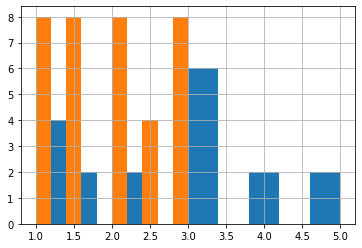

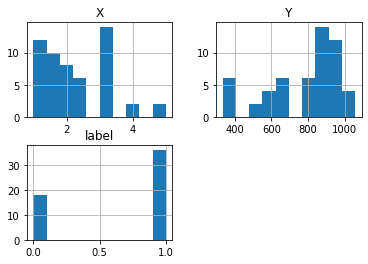

In [120]:
data[data['label'] == 0]['X'].hist()
data[data['label'] == 1]['X'].hist()
data.hist()


3. Determine the prior probability for both classes.

In [121]:
classes = data['label'].unique()
classCounts = data['label'].value_counts()
print(f'Class count :\n{classCounts.sort_index()}')

priors = classCounts/data['label'].size
for c in classes:
    print(f'Priors for class {c} : {priors[c]}')


Class count :
0    18
1    36
Name: label, dtype: int64
Priors for class 0 : 0.3333333333333333
Priors for class 1 : 0.6666666666666666


4. Determine the class conditional probabilities (likelihood) for the classes.

In [122]:

likelihood = data.groupby(data['X'].values).apply(
    lambda x: x['label'].value_counts()/len(x))

print(likelihood)


1.0  1    0.666667
     0    0.333333
1.5  1    0.800000
     0    0.200000
2.0  1    1.000000
2.5  1    0.666667
     0    0.333333
3.0  1    0.571429
     0    0.428571
4.0  0    1.000000
5.0  0    1.000000
Name: label, dtype: float64


5. Plot the count of each unique element for each class.

0  3.0    6
   1.0    4
   5.0    2
   1.5    2
   4.0    2
   2.5    2
1  3.0    8
   2.0    8
   1.5    8
   1.0    8
   2.5    4
Name: X, dtype: int64


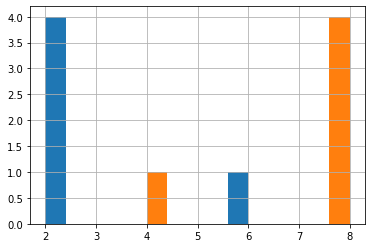

In [123]:
uniqueCntPerClass = data.groupby(data['label'].values).apply(
    lambda x: x['X'].value_counts())

uniqueCntPerClass[0].hist()
uniqueCntPerClass[1].hist()

print(uniqueCntPerClass)


6. Calculate the posterior probability of both classes and plot them.

In [124]:

uniqeFeatures = data['X'].unique()
uniqeFeatures.sort()
evidenceProb = data['X'].value_counts()/len(data)
posterior = []


for c in classes:
    classPost = []
    for f in uniqeFeatures:
        classPost.append((likelihood[f].get(c, 0)*priors[c])/evidenceProb[f])
    posterior.append(classPost)

print(posterior)


[[0.5, 0.36000000000000004, 0.0, 1.0, 0.5510204081632653, 9.0, 9.0], [2.0, 2.8800000000000003, 4.5, 4.0, 1.469387755102041, 0.0, 0.0]]


           0         1
1.0  0.50000  2.000000
1.5  0.36000  2.880000
2.0  0.00000  4.500000
2.5  1.00000  4.000000
3.0  0.55102  1.469388
4.0  9.00000  0.000000
5.0  9.00000  0.000000


<AxesSubplot:>

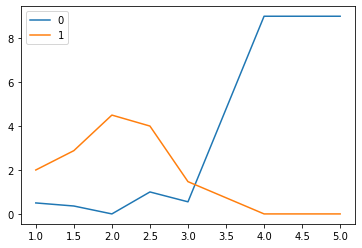

In [125]:

postDf = pd.DataFrame(posterior, columns=uniqeFeatures).T
print(postDf)
postDf.plot()


7. Consider the dataset of question 1 and select any one feature and class label. Repeat
1 to 6.

In [126]:
dataQ1 = pd.read_csv('data-ques-1/iris_dataset.csv')
dataQ1.head()


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


<AxesSubplot:>

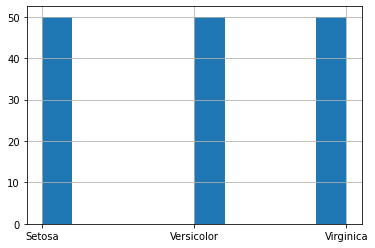

In [127]:
dataQ1['variety'].hist()


- Selected sepal.length as seceted feature

In [128]:
x = 'sepal.length'
label = 'variety'

- Plot the distribution of samples using the histogram.

Class count :
Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64


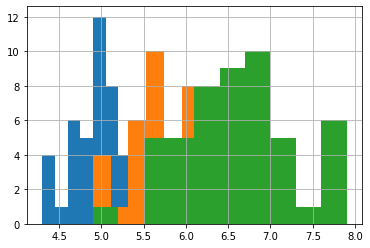

In [129]:
classes = dataQ1[label].unique()
classCounts = dataQ1[label].value_counts()
print(f'Class count :\n{classCounts.sort_index()}')

for cls in classes:
    dataQ1[dataQ1[label]==cls][x].hist()


- Determine the prior probability for both classes

In [130]:
priors = classCounts/dataQ1[label].size
for c in classes:
    print(f'Priors for class {c} : {priors[c]}')

Priors for class Setosa : 0.3333333333333333
Priors for class Versicolor : 0.3333333333333333
Priors for class Virginica : 0.3333333333333333


- Determine the class conditional probabilities (likelihood) for the classes.

In [131]:
likelihood = dataQ1.groupby(dataQ1[x].values).apply(
    lambda x: x[label].value_counts()/len(x))

print(likelihood)

4.3  Setosa        1.000000
4.4  Setosa        1.000000
4.5  Setosa        1.000000
4.6  Setosa        1.000000
4.7  Setosa        1.000000
4.8  Setosa        1.000000
4.9  Setosa        0.666667
     Versicolor    0.166667
     Virginica     0.166667
5.0  Setosa        0.800000
     Versicolor    0.200000
5.1  Setosa        0.888889
     Versicolor    0.111111
5.2  Setosa        0.750000
     Versicolor    0.250000
5.3  Setosa        1.000000
5.4  Setosa        0.833333
     Versicolor    0.166667
5.5  Versicolor    0.714286
     Setosa        0.285714
5.6  Versicolor    0.833333
     Virginica     0.166667
5.7  Versicolor    0.625000
     Setosa        0.250000
     Virginica     0.125000
5.8  Versicolor    0.428571
     Virginica     0.428571
     Setosa        0.142857
5.9  Versicolor    0.666667
     Virginica     0.333333
6.0  Versicolor    0.666667
     Virginica     0.333333
6.1  Versicolor    0.666667
     Virginica     0.333333
6.2  Versicolor    0.500000
     Virginica     0

-  Plot the count of each unique element for each class.

Setosa      5.0    8
            5.1    8
            4.8    5
            5.4    5
            4.9    4
            4.6    4
            5.2    3
            4.4    3
            4.7    2
            5.7    2
            5.5    2
            4.5    1
            5.8    1
            4.3    1
            5.3    1
Versicolor  5.6    5
            5.7    5
            5.5    5
            6.0    4
            6.1    4
            6.3    3
            6.7    3
            5.8    3
            6.2    2
            5.0    2
            6.4    2
            6.6    2
            5.9    2
            5.2    1
            5.4    1
            5.1    1
            7.0    1
            6.8    1
            4.9    1
            6.5    1
            6.9    1
Virginica   6.3    6
            6.7    5
            6.4    5
            7.7    4
            6.5    4
            6.9    3
            7.2    3
            5.8    3
            6.1    2
            6.8    2
            6.2    2
            6

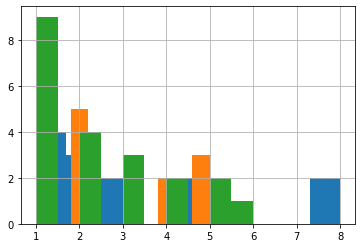

In [132]:
uniqueCntPerClass = dataQ1.groupby(dataQ1[label].values).apply(
    lambda a: a[x].value_counts())

for c in classes:
    uniqueCntPerClass[c].hist()

print(uniqueCntPerClass)

- Calculate the posterior probability of both classes and plot them.

In [133]:

uniqeFeatures = dataQ1[x].unique()
uniqeFeatures.sort()
evidenceProb = dataQ1[x].value_counts()/len(dataQ1)
posterior = []


for c in classes:
    classPost = []
    for f in uniqeFeatures:
        classPost.append((likelihood[f].get(c, 0)*priors[c])/evidenceProb[f])
    posterior.append(classPost)

print(posterior)

[[49.99999999999999, 16.666666666666664, 49.99999999999999, 12.499999999999998, 24.999999999999996, 10.0, 5.555555555555555, 4.0, 4.938271604938271, 9.375, 49.99999999999999, 6.944444444444445, 2.040816326530612, 0.0, 1.5624999999999998, 1.020408163265306, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3888888888888888, 1.0, 0.6172839506172839, 3.1249999999999996, 0.0, 1.3888888888888888, 5.1020408163265305, 6.944444444444445, 3.9062499999999996, 3.061224489795918, 11.11111111111111, 5.555555555555555, 5.555555555555555, 6.249999999999999, 1.8518518518518519, 2.040816326530612, 2.0, 24.999999999999996, 2.34375, 5.555555555555555, 3.1249999999999996, 49.99999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3888888888888888, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3888888888888888, 0.7812499999999999, 3.061224489795918, 5.555555555555555, 2.7777777777777777, 2.7777777777777777, 6.2499

             0          1          2
4.3  50.000000   0.000000   0.000000
4.4  16.666667   0.000000   0.000000
4.5  50.000000   0.000000   0.000000
4.6  12.500000   0.000000   0.000000
4.7  25.000000   0.000000   0.000000
4.8  10.000000   0.000000   0.000000
4.9   5.555556   1.388889   1.388889
5.0   4.000000   1.000000   0.000000
5.1   4.938272   0.617284   0.000000
5.2   9.375000   3.125000   0.000000
5.3  50.000000   0.000000   0.000000
5.4   6.944444   1.388889   0.000000
5.5   2.040816   5.102041   0.000000
5.6   0.000000   6.944444   1.388889
5.7   1.562500   3.906250   0.781250
5.8   1.020408   3.061224   3.061224
5.9   0.000000  11.111111   5.555556
6.0   0.000000   5.555556   2.777778
6.1   0.000000   5.555556   2.777778
6.2   0.000000   6.250000   6.250000
6.3   0.000000   1.851852   3.703704
6.4   0.000000   2.040816   5.102041
6.5   0.000000   2.000000   8.000000
6.6   0.000000  25.000000   0.000000
6.7   0.000000   2.343750   3.906250
6.8   0.000000   5.555556  11.111111
6

<AxesSubplot:>

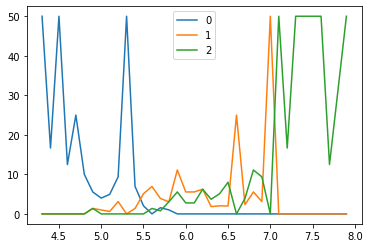

In [134]:

postDf = pd.DataFrame(posterior, columns=uniqeFeatures).T
print(postDf)
postDf.plot()